# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL for the OpenWeatherMap
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rudnya
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | tolanaro
Processing Record 6 of Set 1 | al jawf
Processing Record 7 of Set 1 | walvis bay
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | serafimovich
Processing Record 10 of Set 1 | agat village
Processing Record 11 of Set 1 | prince rupert
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | alliance
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | thunder bay
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | basavana bagevadi
Processing Record 21 of Set 1 | selfoss
Processing Record 22 of Set 1 | kok

Processing Record 40 of Set 4 | lerwick
Processing Record 41 of Set 4 | soio
Processing Record 42 of Set 4 | vinh long
Processing Record 43 of Set 4 | trujillo
Processing Record 44 of Set 4 | hayma'
City not found. Skipping...
Processing Record 45 of Set 4 | iskateley
Processing Record 46 of Set 4 | quartu sant'elena
Processing Record 47 of Set 4 | brisas de zicatela
Processing Record 48 of Set 4 | kyongsong
Processing Record 49 of Set 4 | sao vicente
Processing Record 0 of Set 5 | alice springs
Processing Record 1 of Set 5 | kibre mengist
Processing Record 2 of Set 5 | punta arenas
Processing Record 3 of Set 5 | poronaysk
Processing Record 4 of Set 5 | rio verde de mato grosso
Processing Record 5 of Set 5 | nizhneangarsk
Processing Record 6 of Set 5 | illizi
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | colonia
Processing Record 10 of Set 5 | hermanus
Processing Record 11 of Set 5 | shangri-la
City not found. Skipping

Processing Record 32 of Set 8 | nabire
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | recco
Processing Record 36 of Set 8 | naze
Processing Record 37 of Set 8 | lingyuan
Processing Record 38 of Set 8 | sebdou
Processing Record 39 of Set 8 | kayangel
Processing Record 40 of Set 8 | cabo san lucas
Processing Record 41 of Set 8 | saijo
Processing Record 42 of Set 8 | kabo
Processing Record 43 of Set 8 | talcahuano
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | usinsk
Processing Record 46 of Set 8 | loreto
Processing Record 47 of Set 8 | kismayo
Processing Record 48 of Set 8 | grand falls-windsor
Processing Record 49 of Set 8 | the colony
Processing Record 0 of Set 9 | nguigmi
Processing Record 1 of Set 9 | midvagur
Processing Record 2 of Set 9 | hotan
Processing Record 3 of Set 9 | shimoda
Processing Record 4 of Set 9 | as samawah
Processing Record 5 of Set 9 | general roca
Processing Record

Processing Record 25 of Set 12 | namibe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rudnya,54.9470,31.0934,8.65,73,36,3.70,RU,1684526835
1,port-aux-francais,-49.3500,70.2167,4.76,64,22,12.19,TF,1684526835
2,jamestown,42.0970,-79.2353,19.77,79,100,4.63,US,1684526831
3,bilibino,68.0546,166.4372,4.82,83,97,2.48,RU,1684526836
4,tolanaro,-25.0319,46.9987,21.00,88,3,2.09,MG,1684526836


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rudnya,54.9470,31.0934,8.65,73,36,3.70,RU,1684526835
1,port-aux-francais,-49.3500,70.2167,4.76,64,22,12.19,TF,1684526835
2,jamestown,42.0970,-79.2353,19.77,79,100,4.63,US,1684526831
3,bilibino,68.0546,166.4372,4.82,83,97,2.48,RU,1684526836
4,tolanaro,-25.0319,46.9987,21.00,88,3,2.09,MG,1684526836


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

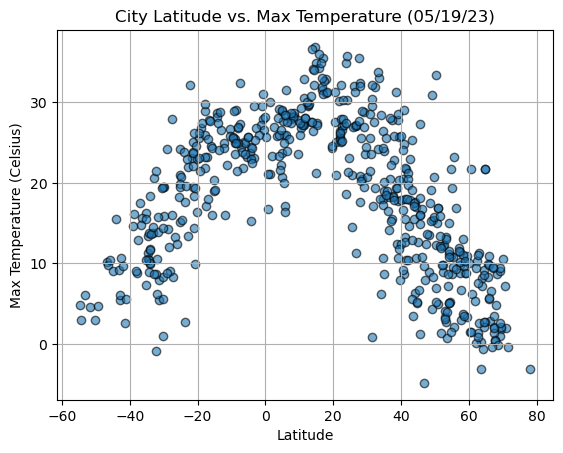

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.6,label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)"% time.strftime("%x"))
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

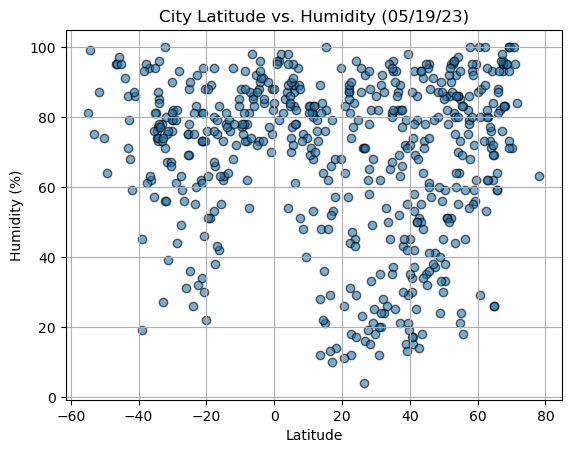

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
           city_data_df["Humidity"],
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.6, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

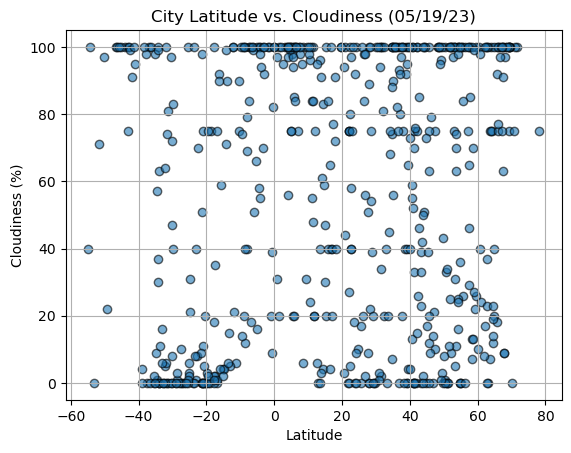

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
           city_data_df["Cloudiness"],edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.6, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

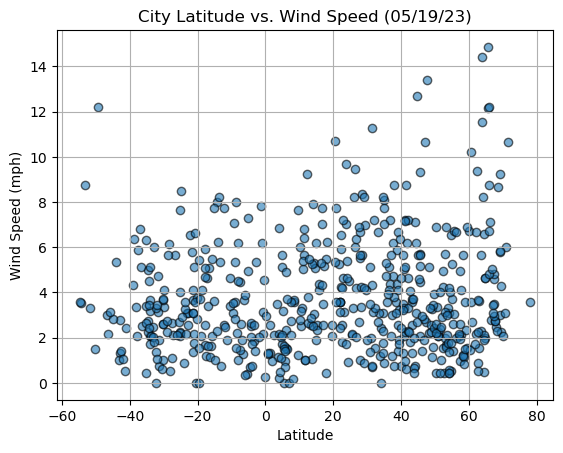

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
           city_data_df["Wind Speed"],edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.6, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {r_value}")
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rudnya,54.9470,31.0934,8.65,73,36,3.70,RU,1684526835
2,jamestown,42.0970,-79.2353,19.77,79,100,4.63,US,1684526831
3,bilibino,68.0546,166.4372,4.82,83,97,2.48,RU,1684526836
5,al jawf,29.5000,38.7500,23.55,25,0,6.97,SA,1684526836
8,serafimovich,49.5786,42.7360,15.33,56,3,1.60,RU,1684526836


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.76,64,22,12.19,TF,1684526835
4,tolanaro,-25.0319,46.9987,21.00,88,3,2.09,MG,1684526836
6,walvis bay,-22.9575,14.5053,13.38,83,1,3.08,NaN,1684526836
7,waitangi,-43.9535,-176.5597,15.46,91,100,5.36,NZ,1684526836
11,grytviken,-54.2811,-36.5092,2.97,99,100,3.54,GS,1684526837


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7894717031501972


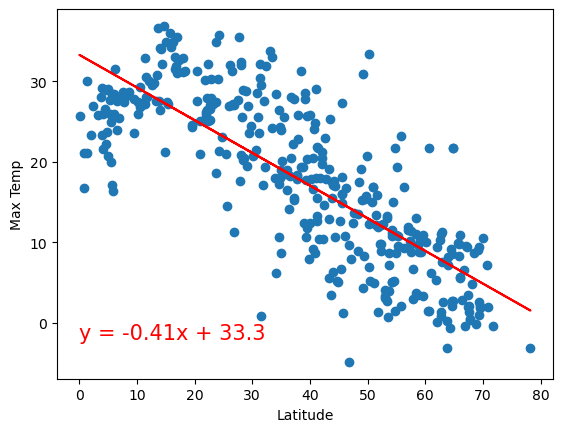

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (0,-2))

The r-value is: 0.7965061570549613


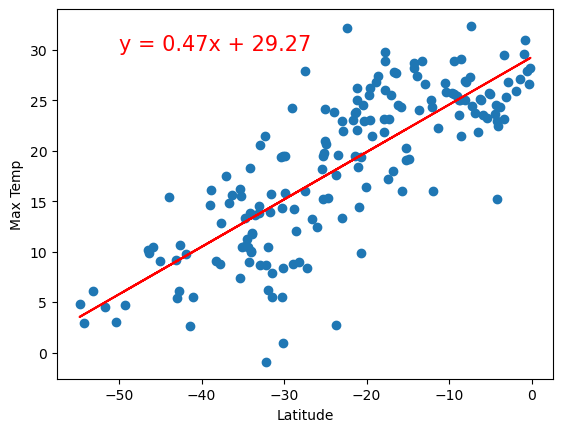

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-50,30))

**Discussion about the linear relationship:** In the northern hemisphere there is a strong negative correlation between temperature and latitude as the "r-value" is close to -1 at nearly -0.8. This strong negative relationship is shown clearly on the graph. In contrast, there is a strong positive correlation between temperature and latitude in the southern hemisphere. The "r-value" is very close to positive 1 at about 0.8. Graphically, it is clear that all the points are trending upwards and that is shown with the regression line. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08586291661591657


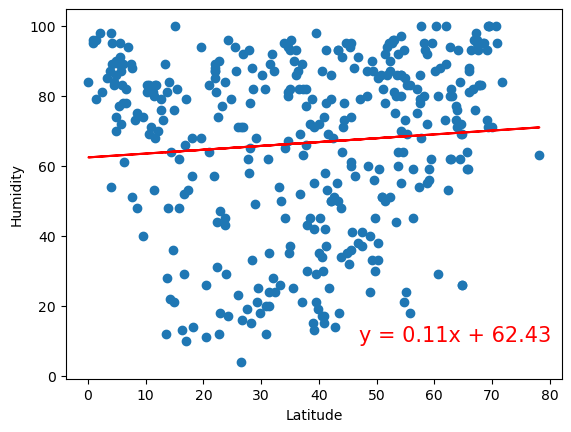

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (47,10))

The r-value is: 0.058070694111112


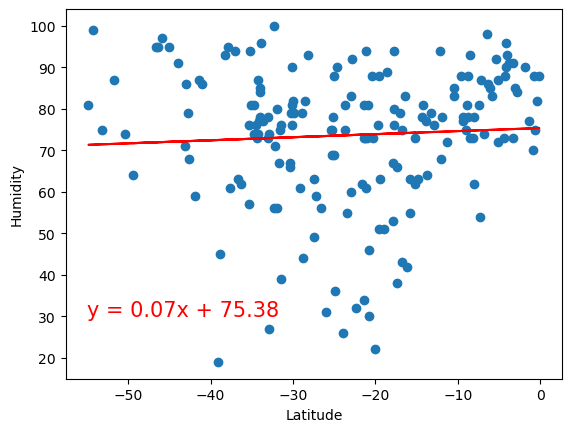

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-55,30))

**Discussion about the linear relationship:** In the northern hemisphere, there is a very weak positive correlation between humidity and latitude. The same could be said for the southern hemisphere. Both have "r-values" that are a little bigger than 0 and the closer this value is to 0 means there is less of a relationship between the two. The northern hemisphere has a little stronger correlation and that can be seen graphically with the slope of the regression line being 0.11 while the southern hemisphere only has a slope of 0.07.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.06672313654217389


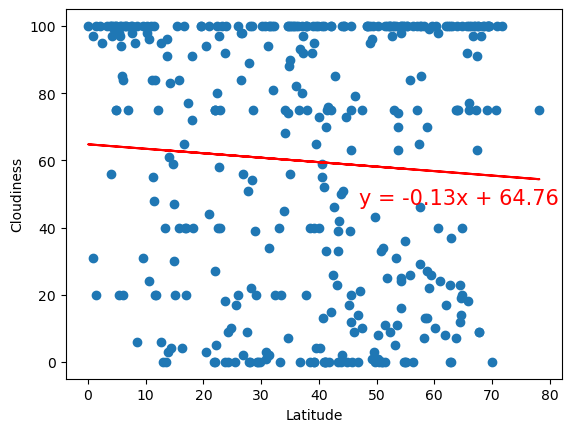

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (47,47))

The r-value is: 0.10455815083593444


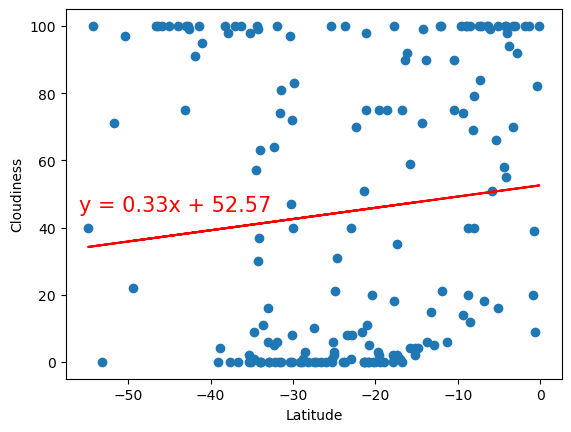

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-56,45))

**Discussion about the linear relationship:** In the northern hemisphere, there is a weak negative relationship between cloudiness and latitude. The "r-value" is negative and still very close to zero which would represent something close to no correlation. Graphically, one can see that the regression line is sloping downwards, but the slope is very small so the relationship is not a strong one. In contrast, the southern hemisphere has a weak positive relationship between cloudiness and latitude as the "r-value" is just 0.1. Looking at both graphs, it does not look like there is any correlation between cloudiness and latitude, but based on the regression line there does exist a weak relationship in both the southern and nothern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10193656907297405


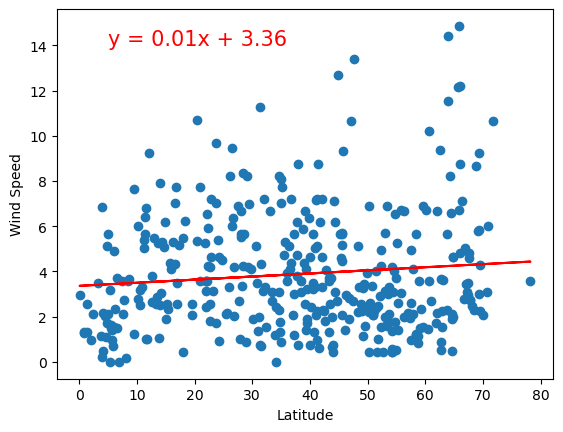

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (5,14))

The r-value is: -0.013483990490794184


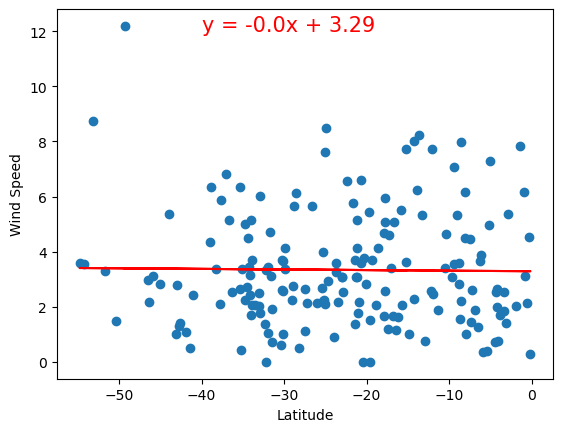

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-40,12))

**Discussion about the linear relationship:** In the northern hemisphere, there is a weak positive relationship between wind speed and latitude. Similar to the relationship between humidity and latitude in the northern hemisphere, the "r-value" is close to 0 at just 0.1 which would represent a positive weak correlation. Graphically, the regression line is barely sloping upwards and the slope is close to 0 at just 0.01. In the southern hemisphere, there is a very weak negative correlation between wind speed and latitude. The "r-value" is negative and very close to 0. Graphically, it looks like the regression line is almost a straight line which would represent no correlation between the two. However, there is a very small slope and one that is close to -0.01. 